In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [2]:
# Load the penguins dataset and drop instances with missing values
penguins = pd.read_csv('penguins.csv').dropna()

In [3]:
# Create three new binary features in the penguins DataFrame for each species
# The categorical variable species is encoded into separate columns, which can be useful for machine learning models that require numerical input.
penguins['Adelie'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(1), int(0), int(0)])
penguins['Chinstrap'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(0), int(1), int(0)])
penguins['Gentoo'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(0), int(0), int(1)])

#displays the first few rows of the modified DataFrame to check the results
penguins.head()

<ipython-input-3-9ed15e578395>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['Adelie'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
<ipython-input-3-9ed15e578395>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['Chinstrap'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
<ipython-input-3-9ed15e578395>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0


1. The target species to Adelie.

In [4]:
# Define the input feature "bill_length_mm" and the output feature "Adelie" (aka, Create a dataframe X containing "bill_length_mm", and the output feature: "Adelie")
X = penguins[['bill_length_mm']]
y = penguins[['Adelie']]

In [5]:
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the intercept and weight of the fitted model
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1: [[-1.1716852]]
w0: [50.24239768]


In [6]:
# Calculate predicted probabilities from the fitted moldel, .predict_proba() calculates predicted probabilities from a fitted model
probs = logisticModel.predict_proba(X)

print('Probabilities: {}'.format(probs))

# Calculate the predicted classes from the fitted moldel, .predict() returns classifications based on those probabilities
classes = logisticModel.predict(X)

print('Classes: {}'.format(classes))

Probabilities: [[1.17799505e-02 9.88220049e-01]
 [1.86912372e-02 9.81308763e-01]
 [4.63761416e-02 9.53623858e-01]
 [7.15687573e-04 9.99284312e-01]
 [1.48445101e-02 9.85155490e-01]
 [9.34205137e-03 9.90657949e-01]
 [1.32249370e-02 9.86775063e-01]
 [1.10451647e-01 8.89548353e-01]
 [6.59157860e-03 9.93408421e-01]
 [6.11518181e-05 9.99938848e-01]
 [6.36608161e-04 9.99363392e-01]
 [7.40490285e-03 9.92595097e-01]
 [3.90365351e-01 6.09634649e-01]
 [4.83775242e-05 9.99951622e-01]
 [9.74793443e-01 2.52065566e-02]
 [2.59208521e-03 9.97407915e-01]
 [2.30615300e-03 9.97693847e-01]
 [2.80431934e-04 9.99719568e-01]
 [4.13541709e-03 9.95864583e-01]
 [8.31774160e-03 9.91682258e-01]
 [1.38859345e-04 9.99861141e-01]
 [6.46472225e-02 9.35352778e-01]
 [5.79134694e-02 9.42086531e-01]
 [2.91336569e-03 9.97086634e-01]
 [5.79134694e-02 9.42086531e-01]
 [1.86912372e-02 9.81308763e-01]
 [1.28500313e-03 9.98714997e-01]
 [1.86912372e-02 9.81308763e-01]
 [8.94415251e-02 9.10558475e-01]
 [5.03684608e-04 9.99496315e

In [7]:
# Classify the first 6 instances in X
logisticModel.predict(X)[0:6]

array([1, 1, 1, 1, 1, 1])

In [8]:
# Calculate the proportion of instances correctly classified
logisticModel.score(X, np.ravel(y))

0.9429429429429429

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of Adelie')

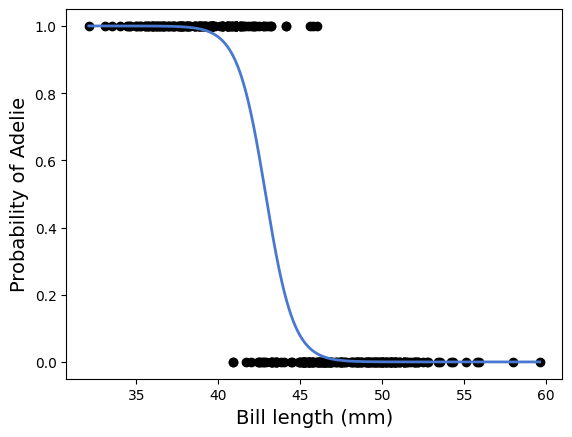

In [9]:
# Plot logistic regression model
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Adelie', fontsize=14)

In [10]:
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty='l2')

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the intercept and weight of the fitted model
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1: [[-1.14305418]]
w0: [49.01692562]


In [11]:
# Calculate predicted probabilities from the fitted moldel, .predict_proba() calculates predicted probabilities from a fitted model
probs = logisticModel.predict_proba(X)

print('Probabilities: {}'.format(probs))

# Calculate the predicted classes from the fitted moldel, .predict() returns classifications based on those probabilities
classes = logisticModel.predict(X)

print('Classes: {}'.format(classes))

Probabilities: [[1.30799652e-02 9.86920035e-01]
 [2.05066613e-02 9.79493339e-01]
 [4.96495104e-02 9.50350490e-01]
 [8.52199486e-04 9.99147801e-01]
 [1.63845452e-02 9.83615455e-01]
 [1.04348115e-02 9.89565189e-01]
 [1.46406871e-02 9.85359313e-01]
 [1.15331850e-01 8.84668150e-01]
 [7.42806258e-03 9.92571937e-01]
 [7.73377420e-05 9.99922662e-01]
 [7.60219551e-04 9.99239780e-01]
 [8.32007603e-03 9.91679924e-01]
 [3.92426682e-01 6.07573318e-01]
 [6.15338273e-05 9.99938466e-01]
 [9.72443311e-01 2.75566890e-02]
 [2.99002877e-03 9.97009971e-01]
 [2.66792391e-03 9.97332076e-01]
 [3.41684610e-04 9.99658315e-01]
 [4.71511319e-03 9.95284887e-01]
 [9.31820304e-03 9.90681797e-01]
 [1.72125733e-04 9.99827874e-01]
 [6.85661583e-02 9.31433842e-01]
 [6.16163575e-02 9.38383643e-01]
 [3.35089145e-03 9.96649109e-01]
 [6.16163575e-02 9.38383643e-01]
 [2.05066613e-02 9.79493339e-01]
 [1.50822829e-03 9.98491772e-01]
 [2.05066613e-02 9.79493339e-01]
 [9.39774090e-02 9.06022591e-01]
 [6.04953631e-04 9.99395046e

In [12]:
# Classify the first 6 instances in X
logisticModel.predict(X)[0:6]

array([1, 1, 1, 1, 1, 1])

In [13]:
# Calculate the proportion of instances correctly classified
logisticModel.score(X, np.ravel(y))

0.9429429429429429

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of Adelie')

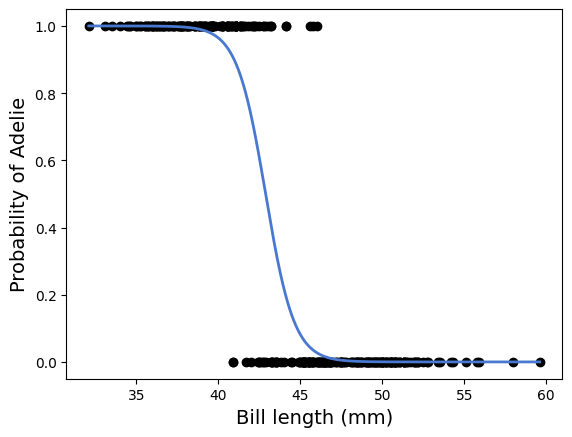

In [14]:
# Plot logistic regression model
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Adelie', fontsize=14)

In [15]:
# Use two input features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['Adelie']]

In [16]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[-2.2096875   3.99767721]]
w0: [24.13003698]


In [17]:
# Proportion of instances correctly classified
logisticModel.score(X, y)

0.9819819819819819

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


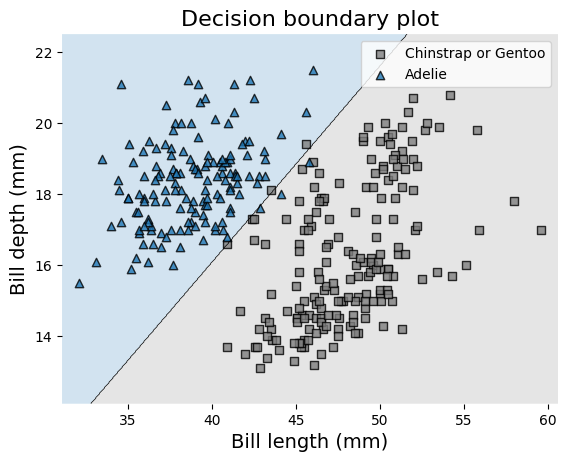

In [18]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=logisticModel, contourf_kwargs=contourf_kwargs,
                          colors='#7f7f7f,#1f77b4')

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Chinstrap or Gentoo')
L.get_texts()[1].set_text('Adelie')

In [19]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty='l2')

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[-1.37707394  1.98295306]]
w0: [24.28390878]


In [20]:
# Proportion of instances correctly classified
logisticModel.score(X, y)

0.9819819819819819

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


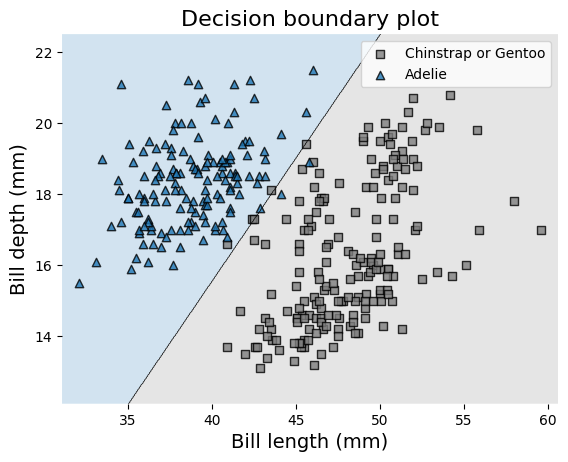

In [21]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=logisticModel, contourf_kwargs=contourf_kwargs,
                          colors='#7f7f7f,#1f77b4')

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Chinstrap or Gentoo')
L.get_texts()[1].set_text('Adelie')

2. The target species to Chinstrap.

In [22]:
# Define the input feature "bill_length_mm" and the output feature "Chinstrap"
X = penguins[['bill_length_mm']]
y = penguins[['Chinstrap']]

In [23]:
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the intercept and weight of the fitted model
print('w1: ', logisticModel.coef_)
print('w0: ', logisticModel.intercept_)

w1:  [[0.26976076]]
w0:  [-13.77399262]


In [24]:
# Calculate predicted probabilities from the fited model
probs = logisticModel.predict_proba(X)

print('Probabilities: {}'.format(probs))

# Calculate the predicted classes from the fitted model
classes = logisticModel.predict(X)

print('Classes: {}'.format(classes))

Probabilities: [[0.9618138  0.0381862 ]
 [0.9576471  0.0423529 ]
 [0.94797649 0.05202351]
 [0.97964318 0.02035682]
 [0.95978212 0.04021788]
 [0.96374673 0.03625327]
 [0.96081059 0.03918941]
 [0.93624474 0.06375526]
 [0.96647057 0.03352943]
 [0.9883447  0.0116553 ]
 [0.98017425 0.01982575]
 [0.96558532 0.03441468]
 [0.90963285 0.09036715]
 [0.9889501  0.0110499 ]
 [0.79657073 0.20342927]
 [0.97280196 0.02719804]
 [0.97350667 0.02649333]
 [0.98352957 0.01647043]
 [0.96979659 0.03020341]
 [0.96467755 0.03532245]
 [0.98595629 0.01404371]
 [0.94383755 0.05616245]
 [0.9452505  0.0547495 ]
 [0.97207905 0.02792095]
 [0.9452505  0.0547495 ]
 [0.9576471  0.0423529 ]
 [0.97677194 0.02322806]
 [0.9576471  0.0423529 ]
 [0.93939038 0.06060962]
 [0.98119597 0.01880403]
 [0.96081059 0.03918941]
 [0.96467755 0.03532245]
 [0.91606837 0.08393163]
 [0.97419361 0.02580639]
 [0.95424041 0.04575959]
 [0.98069173 0.01930827]
 [0.9409082  0.0590918 ]
 [0.98308684 0.01691316]
 [0.86732865 0.13267135]
 [0.977965

In [25]:
# Classify the first 6 instance in X
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

In [26]:
# Calculate the proportion of instances correctly classified
logisticModel.score(X, np.ravel(y))

0.8108108108108109

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of Chinstrap')

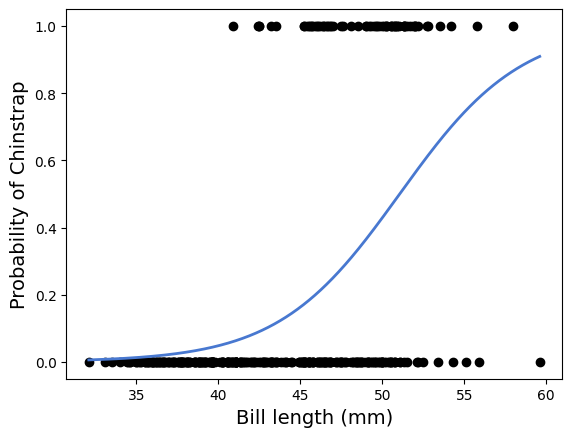

In [27]:
# Plot logistic regression model
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Chinstrap', fontsize=14)

In [28]:
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty='l2')

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the intercept and weight of the fitted model
print('w1: ', logisticModel.coef_)
print('w0: ', logisticModel.intercept_)

w1:  [[0.26936153]]
w0:  [-13.75501826]


In [29]:
# Calculate predicted probabilities from the fited model
probs = logisticModel.predict_proba(X)

print('Probabilities: {}'.format(probs))

# Calculate the predicted classes from the fitted model
classes = logisticModel.predict(X)

print('Classes: {}'.format(classes))

Probabilities: [[0.96169004 0.03830996]
 [0.95751693 0.04248307]
 [0.947834   0.052166  ]
 [0.9795568  0.0204432 ]
 [0.95965514 0.04034486]
 [0.9636262  0.0363738 ]
 [0.96068522 0.03931478]
 [0.9360914  0.0639086 ]
 [0.96635488 0.03364512]
 [0.98828509 0.01171491]
 [0.98008929 0.01991071]
 [0.96546801 0.03453199]
 [0.90946773 0.09053227]
 [0.98889268 0.01110732]
 [0.79647189 0.20352811]
 [0.97269903 0.02730097]
 [0.9734053  0.0265947 ]
 [0.98345421 0.01654579]
 [0.96968732 0.03031268]
 [0.96455863 0.03544137]
 [0.98588854 0.01411146]
 [0.94369077 0.05630923]
 [0.94510512 0.05489488]
 [0.97197454 0.02802546]
 [0.94510512 0.05489488]
 [0.95751693 0.04248307]
 [0.97667821 0.02332179]
 [0.95751693 0.04248307]
 [0.93923955 0.06076045]
 [0.98111383 0.01888617]
 [0.96068522 0.03931478]
 [0.96455863 0.03544137]
 [0.91590469 0.08409531]
 [0.97409378 0.02590622]
 [0.95410551 0.04589449]
 [0.98060819 0.01939181]
 [0.9407587  0.0592413 ]
 [0.98301015 0.01698985]
 [0.86717112 0.13282888]
 [0.977874

In [30]:
# Classify the first 6 instance in X
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

In [31]:
# Calculate the proportion of instances correctly classified
logisticModel.score(X, np.ravel(y))

0.8108108108108109

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of Chinstrap')

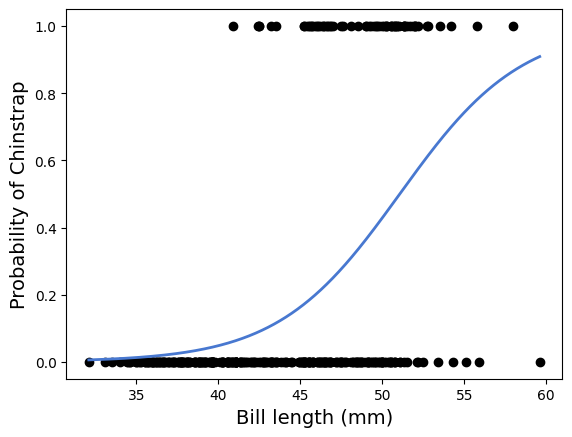

In [32]:
# Plot logistic regression model
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Chinstrap', fontsize=14)

In [33]:
# Use two input features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['Chinstrap']]

In [34]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[0.34985645 0.8025494 ]]
w0: [-31.42822466]


In [35]:
# Proportion of instances correctly classified
logisticModel.score(X, y)

0.8798798798798799

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


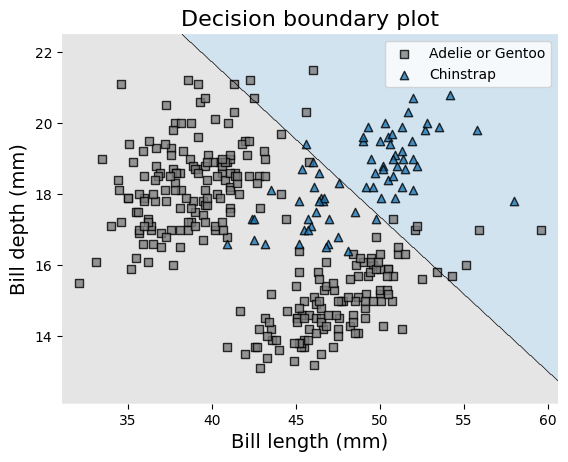

In [36]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=logisticModel, contourf_kwargs=contourf_kwargs,
                          colors='#7f7f7f,#1f77b4')

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Adelie or Gentoo')
L.get_texts()[1].set_text('Chinstrap')

In [37]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty='l2')

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[0.34708881 0.79036638]]
w0: [-31.08350466]


In [38]:
# Proportion of instances correctly classified
logisticModel.score(X, y)

0.8798798798798799

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


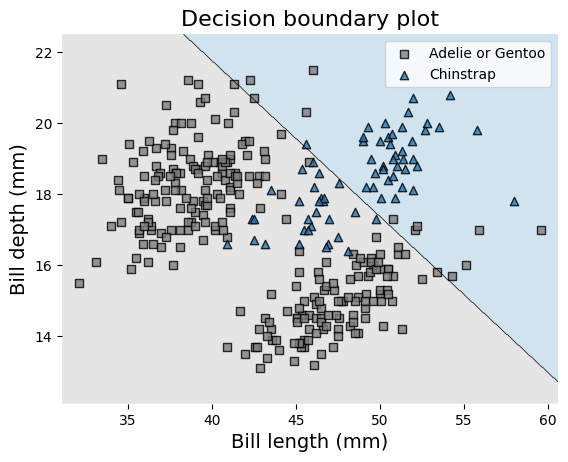

In [39]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=logisticModel, contourf_kwargs=contourf_kwargs,
                          colors='#7f7f7f,#1f77b4')

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Adelie or Gentoo')
L.get_texts()[1].set_text('Chinstrap')

3. The target species to Gentoo.

In [40]:
# Define the input feature "bill_length_mm" and the output feature "Gentoo"
X = penguins[['bill_length_mm']]
y = penguins[['Gentoo']]

In [41]:
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the intercept and weight of the fitted model
print('w1: ', logisticModel.coef_)
print('w0: ', logisticModel.intercept_)

w1:  [[0.23229357]]
w0:  [-11.0101527]


In [42]:
# Calculate predicted probabilities from the fited model
probs = logisticModel.predict_proba(X)

print('Probabilities: {}'.format(probs))

# Calculate the predicted classes from the fitted model
classes = logisticModel.predict(X)

print('Classes: {}'.format(classes))

Probabilities: [[0.87296959 0.12703041]
 [0.86230367 0.13769633]
 [0.83871824 0.16128176]
 [0.92308204 0.07691796]
 [0.86772772 0.13227228]
 [0.87803292 0.12196708]
 [0.8703712  0.1296288 ]
 [0.81197384 0.18802616]
 [0.88530146 0.11469854]
 [0.95132986 0.04867014]
 [0.92471524 0.07528476]
 [0.8829215  0.1170785 ]
 [0.7572527  0.2427473 ]
 [0.95343642 0.04656358]
 [0.58045672 0.41954328]
 [0.90286364 0.09713636]
 [0.9048819  0.0951181 ]
 [0.9352823  0.0647177 ]
 [0.89440412 0.10559588]
 [0.88049881 0.11950119]
 [0.94322398 0.05677602]
 [0.82906764 0.17093236]
 [0.83233446 0.16766554]
 [0.90080726 0.09919274]
 [0.83233446 0.16766554]
 [0.86230367 0.13769633]
 [0.9144195  0.0855805 ]
 [0.86230367 0.13769633]
 [0.81896423 0.18103577]
 [0.92788641 0.07211359]
 [0.8703712  0.1296288 ]
 [0.88049881 0.11950119]
 [0.76983223 0.23016777]
 [0.90686255 0.09313745]
 [0.85381838 0.14618162]
 [0.92631653 0.07368347]
 [0.82238277 0.17761723]
 [0.93386194 0.06613806]
 [0.68265635 0.31734365]
 [0.917985

In [43]:
# Classify the first 6 instance in X
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

In [44]:
# Calculate the proportion of instances correctly classified
logisticModel.score(X, np.ravel(y))

0.6936936936936937

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of Gentoo')

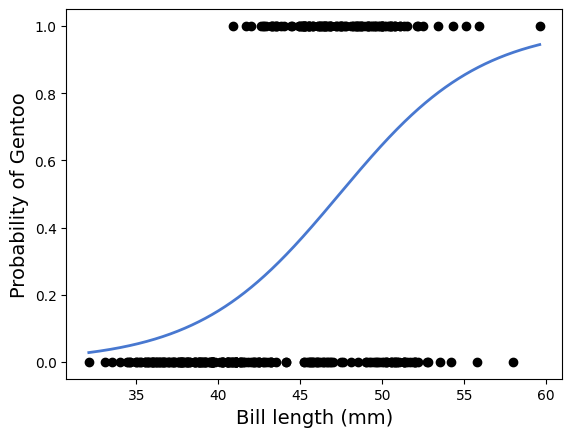

In [45]:
# Plot logistic regression model
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Gentoo', fontsize=14)

In [46]:
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty='l2')

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the intercept and weight of the fitted model
print('w1: ', logisticModel.coef_)
print('w0: ', logisticModel.intercept_)

w1:  [[0.23209661]]
w0:  [-11.00116766]


In [47]:
# Calculate predicted probabilities from the fited model
probs = logisticModel.predict_proba(X)

print('Probabilities: {}'.format(probs))

# Calculate the predicted classes from the fitted model
classes = logisticModel.predict(X)

print('Classes: {}'.format(classes))

Probabilities: [[0.87282714 0.12717286]
 [0.86216052 0.13783948]
 [0.83857648 0.16142352]
 [0.92295723 0.07704277]
 [0.86758481 0.13241519]
 [0.87789113 0.12210887]
 [0.8702285  0.1297715 ]
 [0.81183793 0.18816207]
 [0.88516102 0.11483898]
 [0.95122928 0.04877072]
 [0.92459148 0.07540852]
 [0.88278056 0.11721944]
 [0.75713977 0.24286023]
 [0.95333822 0.04666178]
 [0.58047501 0.41952499]
 [0.9027285  0.0972715 ]
 [0.90474757 0.09525243]
 [0.93516633 0.06483367]
 [0.89426604 0.10573396]
 [0.88035743 0.11964257]
 [0.94311504 0.05688496]
 [0.82892751 0.17107249]
 [0.83219372 0.16780628]
 [0.90067133 0.09932867]
 [0.83219372 0.16780628]
 [0.86216052 0.13783948]
 [0.91428965 0.08571035]
 [0.86216052 0.13783948]
 [0.81882639 0.18117361]
 [0.92776482 0.07223518]
 [0.8702285  0.1297715 ]
 [0.88035743 0.11964257]
 [0.76971289 0.23028711]
 [0.90672907 0.09327093]
 [0.85367528 0.14632472]
 [0.92619385 0.07380615]
 [0.8222441  0.1777559 ]
 [0.93374483 0.06625517]
 [0.68259155 0.31740845]
 [0.917857

In [48]:
# Classify the first 6 instance in X
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

In [49]:
# Calculate the proportion of instances correctly classified
logisticModel.score(X, np.ravel(y))

0.6936936936936937

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of Gentoo')

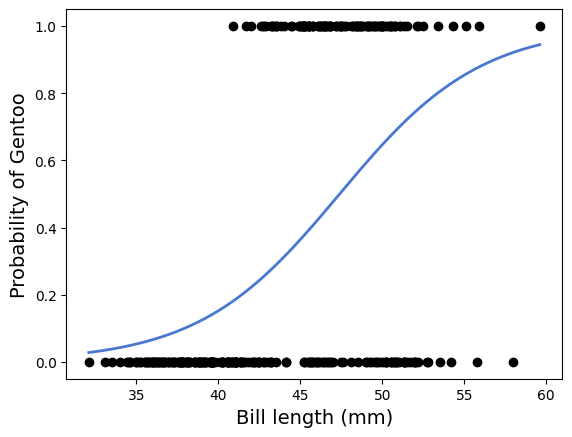

In [50]:
# Plot logistic regression model
plt.scatter(X, y, color='black')

xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]

plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Gentoo', fontsize=14)

In [51]:
# Use two input features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['Gentoo']]

In [52]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[ 0.55611063 -4.47532812]]
w0: [48.12121712]


In [53]:
# Proportion of instances correctly classified
logisticModel.score(X, y)

0.9819819819819819

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


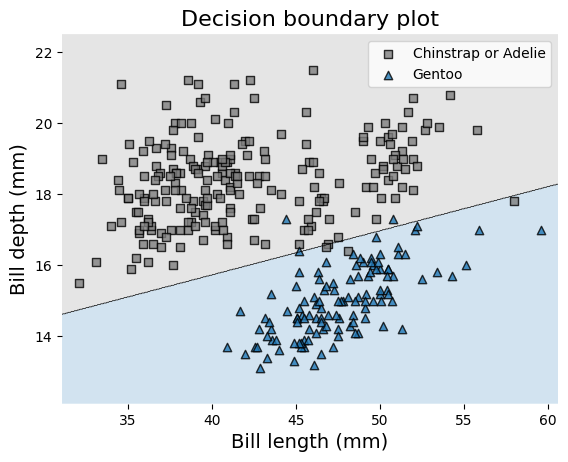

In [54]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=logisticModel, contourf_kwargs=contourf_kwargs,
                          colors='#7f7f7f,#1f77b4')

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Chinstrap or Adelie')
L.get_texts()[1].set_text('Gentoo')

In [55]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty='l2')

# Fit the model
logisticModel.fit(X, np.ravel(y))

# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[ 0.44691134 -2.9751132 ]]
w0: [28.3295998]


In [56]:
# Proportion of instances correctly classified
logisticModel.score(X, y)

0.9819819819819819

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


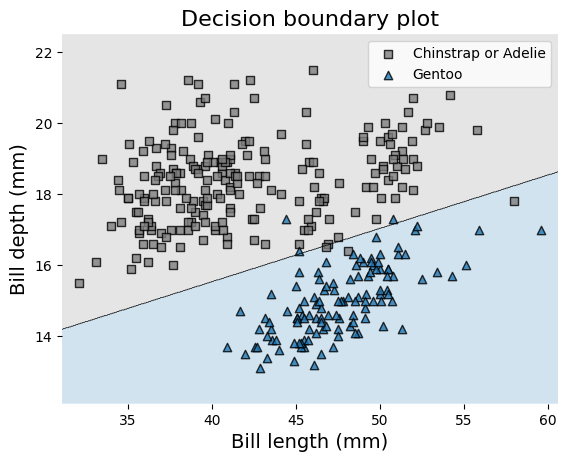

In [57]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=logisticModel, contourf_kwargs=contourf_kwargs,
                          colors='#7f7f7f,#1f77b4')

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Chinstrap or Adelie')
L.get_texts()[1].set_text('Gentoo')